## Chapter 3: Solving Problems by Searching

> In which we see how an agent can find a sequence of actions that achieves goals when no single action will do.

If you imagine a vacuuming robot whose performance is measured by the cleanliness of the floor at each given time step, it's easy to work out what to do in any given moment. If the floor is dirty you suck up all the dirt, and if the floor is clean then you move to a new square and repeat the process. Each immediate action has a value that you can determine since it's simple to see how each choice you make will impact the performance measure.

But what do you do when you have several options for action that have _unknown value_? How do you decide what steps you should take? An example of this would be trying to drive from one town to another; there's many different possible paths you can take and it's not clear which one will put you in the best position.

Searching is the solution to this -- exploring different combinations of actions in order to find the one that works best (or to find any solution at all in a reasonable amount of time).

There's two main types of searches:

* Uninformed searches, which have no knowledge other than the description of the problem.
* Informed searches, which can make use of specialised information (heurisitics) to better optimise what to search first.



### Trees, Graphs and Queues

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import queue

In [21]:
G = nx.DiGraph()

G.add_node("I")

G.add_node("A")
G.add_edge("I", "A", action="Successor 1")

G.add_node("B")
G.add_edge("I", "B", action="Successor 2")

G.add_node("C")
G.add_edge("A", "C", action="Successor 1 -> 2")

G.add_node("D")
G.add_edge("B", "D", action="Successor 2 -> 1")
G.add_node("E")
G.add_edge("B", "E", action="Successor 2 -> 2")

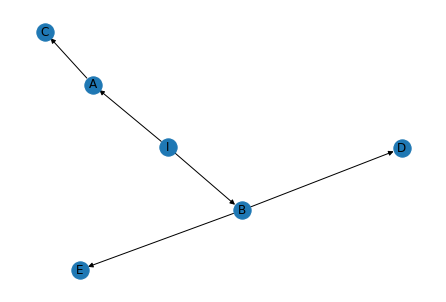

In [22]:
nx.draw(G, with_labels=True)

In [64]:
# solution finds the action sequence to achieve a goal state by unwinding from the goal node.
def solution(g, end):
    predecessors = [x for x in g.predecessors(end)]
    
    if len(predecessors) == 0:
        return actions
    
    return solution(g, predecessors[0]) + predecessors

# breadth_first_search uses the breadth-first search strategy in order to find a goal node in state space.
def breadth_first_search(g, initial, goal):
    if initial == goal:
        return [initial]
    
    node = initial
    
    frontier = SetQueue()
    frontier.put(node)
    
    explored = set()
    
    while not frontier.empty():
        node = frontier.get()
        explored.add(node)
        
        for child in g.successors(node):
            if not (child in explored or child in frontier):
                if child == goal:
                    return solution(g, child)

                frontier.put(child)
        
    return False
    

In [65]:
breadth_first_search(G, "I", "D")

TypeError: argument of type 'SetQueue' is not iterable

In [49]:
fibonacci = lambda x: 0 if x == 0 else 1 if x == 1 else 1 if x == 2 else fibonacci(x - 2) + fibonacci(x - 1)
fibonacci(7)

13